# Benchmark notebook

Create synthetic dataset to test our creations and compare with our linear regression friend!

[-4.18848315 -4.14093608 -4.31418967 -4.34999671 -4.35641239 -4.45733843
 -4.54369663 -4.4925609  -4.69782234 -4.68159735 -4.64654713 -4.55272615
 -4.67048442 -4.76926721 -4.70445099 -4.82051825 -4.87981595 -4.92752998
 -4.86451193 -4.90818309 -4.98061855 -4.95261106 -4.96777386 -4.94213441
 -5.00244163 -4.96371038 -5.0298306  -5.01677086 -5.04373606 -5.04830584
 -5.00411534 -4.97309301 -5.05485776 -5.05992121 -4.93844549 -4.98139455
 -4.97296053 -4.98938979 -4.88901261 -5.06956069 -4.95079598 -4.86607507
 -4.87031285 -4.89656084 -4.85329196 -4.81029841 -4.85929618 -4.74365736
 -4.74252918 -4.77876922 -4.58160575 -4.68182978 -4.52428688 -4.462554
 -4.42371294 -4.48261779 -4.37186511 -4.29753621 -4.28063159 -4.16369812]


<AxesSubplot:>

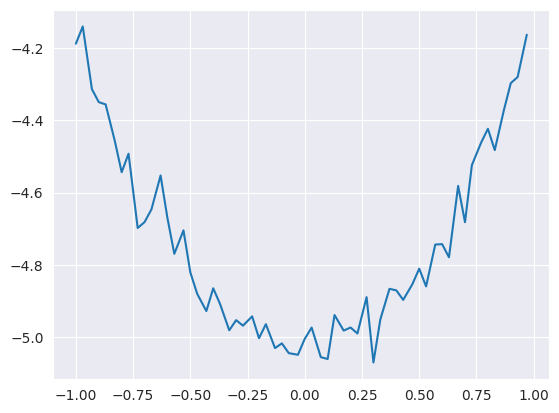

In [1]:
import numpy as np
import seaborn as sns

# Generate dataset using weird non-linear function

n_obs = 60
step = 2 / n_obs
x_1 = np.arange(-1, 1, step=step)
x_1 = np.array(list(map(lambda x: np.round(x, 2), x_1)))
x_2 = np.random.normal(0, 0.05, n_obs) - np.log(np.abs(x_1) + 1) / 5

y = x_1 ** 2 + x_2 - 5
print(y)

sns.lineplot(x=x_1, y=y)

In [2]:
# np.random.normal(0, 1, n_obs)
np.corrcoef(x_1, x_2)

array([[1.        , 0.09520467],
       [0.09520467, 1.        ]])

(60, 3)
Optimal weights: [[-4.88601383e+00]
 [-2.24346221e-03]
 [-1.92399623e+00]]
RMSE = 0.19229830401724066


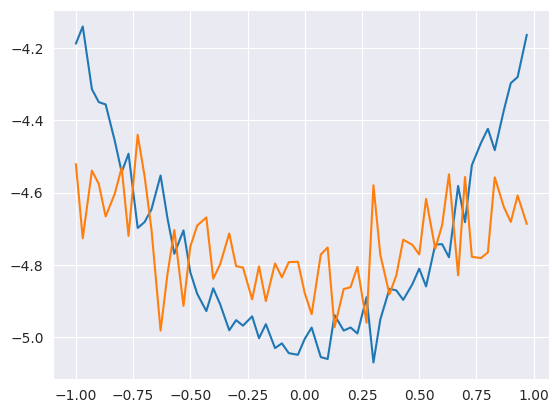

In [3]:
# Bench-mark it with a dumb model
X = np.matrix([np.ones(n_obs), x_1, x_2]).T
print(X.shape)

beta_s = np.linalg.inv((X.T * X)) * X.T * y.reshape(-1, 1)
print(f"Optimal weights: {beta_s}")

y_pred = beta_s.T * X.T
y_pred = np.squeeze(np.asarray(y_pred))

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=y_pred)
rss = np.sqrt((y - y_pred) ** 2)
print(f"RMSE = {rss.mean()}")

In [4]:
# OK, lets go for a minimal decision tree
from core.decision_tree_mini import DT

_mobs = 20
tree = DT(minimum_obs=_mobs, maximum_tree_size=30)
tree = tree.fit(np.asarray(X), y)
tree.print_tree(tree, col_names=['constant', 'f1', 'f2'])



|ROOT|f1(-0.803)
FINAL VAL: -4.301226071775292
|R|-f1(0.7910000000000001)
|L|--f2(-0.16317168986321087)
FINAL VAL: -4.676743063725779
|R|---f1(-0.5619999999999999)
FINAL VAL: -4.626317163736535
|R|----f1(0.5790000000000001)
|L|-----f1(0.45799999999999996)
|L|------f1(0.3340000000000001)
|L|-------f2(0.01919220423752961)
FINAL VAL: -5.018469935155648
FINAL VAL: -4.933517036798292
FINAL VAL: -4.87764958781857
FINAL VAL: -4.816635977228668
FINAL VAL: -4.577743953191884
FINAL VAL: -4.336676959592935


RMSE = 0.06806775380308354


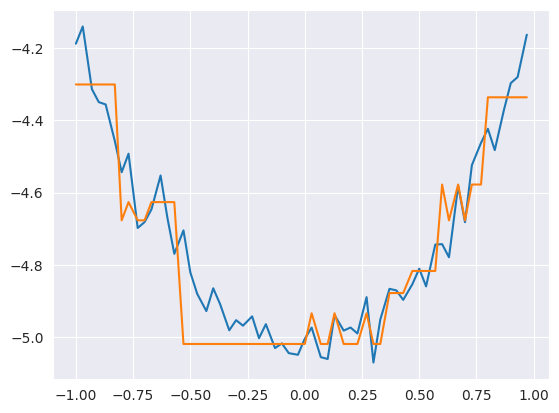

In [5]:
pred = lambda x: tree.predict(tree, x)
tree_preds = np.array([pred(np.asarray(X)[i,:]) for i in range(X.shape[0])])

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=tree_preds)
rss = np.sqrt((y - tree_preds) ** 2)
print(f"RMSE = {rss.mean()}")



  7%|▋         | 1/15 [00:00<00:05,  2.40it/s]

RUN 0 - RMSE 0.14748803573697014


 13%|█▎        | 2/15 [00:00<00:05,  2.43it/s]

RUN 1 - RMSE 0.098619490038738


 20%|██        | 3/15 [00:01<00:04,  2.60it/s]

RUN 2 - RMSE 0.06586898501278567


 27%|██▋       | 4/15 [00:01<00:03,  2.77it/s]

RUN 3 - RMSE 0.043983079328584994


 33%|███▎      | 5/15 [00:01<00:03,  2.92it/s]

RUN 4 - RMSE 0.02916482885721468


 40%|████      | 6/15 [00:02<00:03,  2.88it/s]

RUN 5 - RMSE 0.019293529765095293


 47%|████▋     | 7/15 [00:02<00:02,  2.91it/s]

RUN 6 - RMSE 0.012799692317670915


 53%|█████▎    | 8/15 [00:02<00:02,  2.69it/s]

RUN 7 - RMSE 0.008475223579602783


 60%|██████    | 9/15 [00:03<00:02,  2.73it/s]

RUN 8 - RMSE 0.00562021973774384


 67%|██████▋   | 10/15 [00:03<00:01,  2.78it/s]

RUN 9 - RMSE 0.003741248017089438


 73%|███████▎  | 11/15 [00:04<00:01,  2.76it/s]

RUN 10 - RMSE 0.002531696700165176


 80%|████████  | 12/15 [00:04<00:01,  2.68it/s]

RUN 11 - RMSE 0.0016840922577499918


 87%|████████▋ | 13/15 [00:04<00:00,  2.62it/s]

RUN 12 - RMSE 0.001102403455291808


 93%|█████████▎| 14/15 [00:05<00:00,  2.60it/s]

RUN 13 - RMSE 0.0007290409146785433


100%|██████████| 15/15 [00:05<00:00,  2.68it/s]

RUN 14 - RMSE 0.0004835692109742625
RMSE = 0.0004835692109742625


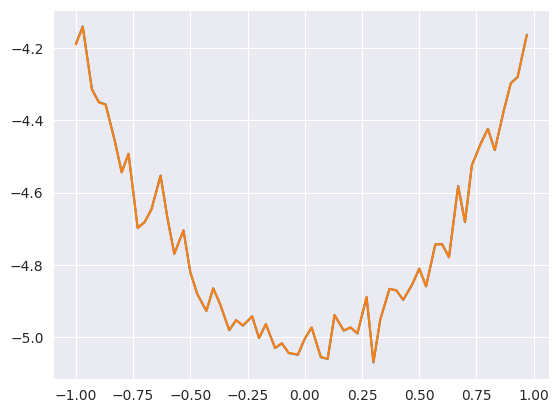

In [55]:
# OK, our dumb tree can actually learn something, and it's better than the linear regression fren
# Lets go for EBM
from core.ebm_mini import EBM

_minobs = 15
_max_tree = 25
test = EBM(num_iter=_minobs, max_tree_size=_max_tree, learning_rate=0.1)
test = test.fit(np.asarray(X), y)
ebm_preds = test.predict_bulk(X)

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=ebm_preds)
rss = np.sqrt((y - ebm_preds) ** 2)
print(f"RMSE = {rss.mean()}")


In [50]:
# models
test.model.keys()

dict_keys(['0', '1', '2', '0_2', '1_2'])

(15, 60)


<AxesSubplot:>

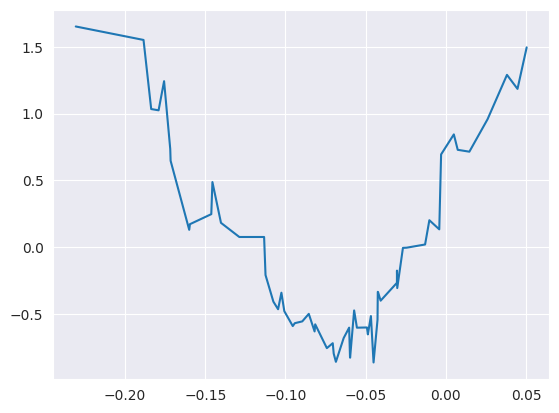

In [86]:
# DT.print_tree(test.model[1][5],col_names=['constant', 'f1', 'f2'])
model_idx = str(2)
X = np.matrix([np.ones(n_obs), x_1, x_2]).T
X = X[np.asarray(X)[:, int(model_idx)].argsort()]

stack = []
for idx,m in enumerate(test.model[model_idx]):
    x1 = []
    for i in range(X.shape[0]):
        x1.append(DT.predict(m, np.asarray(X[i,int(model_idx)]).reshape(-1,1)))
    stack.append(x1)

stack = np.array(stack)
print(stack.shape)
stack = np.array(stack).sum(axis=0)
# stack = test._y_mu + stack.sum(axis=0)*test.lr
sns.lineplot(x=np.squeeze(np.asarray(X[:, int(model_idx)])), y=stack)
# if model_idx == '1':
#     sns.lineplot(x=x_1, y=y)
# else:
#     sns.lineplot(x=x_2, y=y)

# Now lets see results for MS EBM

In [72]:
from interpret.glassbox import ExplainableBoostingRegressor

seed = 42
ebm = ExplainableBoostingRegressor(random_state=seed)
ebm.fit(np.asarray(X), y)



ExplainableBoostingRegressor(feature_names=['feature_0001', 'feature_0002',
                                            'feature_0003',
                                            'feature_0002 x feature_0003',
                                            'feature_0001 x feature_0002',
                                            'feature_0001 x feature_0003'],
                             feature_types=['categorical', 'continuous',
                                            'continuous', 'interaction',
                                            'interaction', 'interaction'])

In [66]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [73]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

In [84]:
ebm_local = ebm.explain_local(np.asarray(X)[:5], y[:5])
show(ebm_local)

<AxesSubplot:>

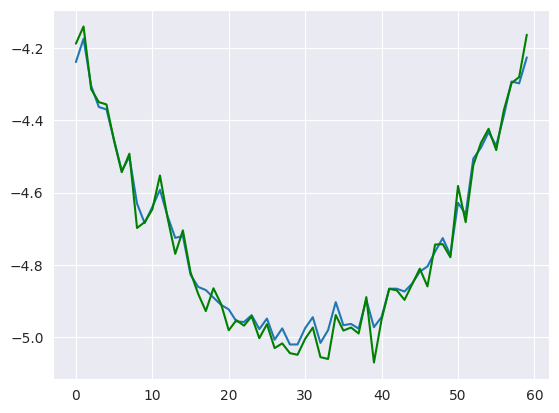

In [82]:
sns.lineplot(x=np.arange(0, X.shape[0]), y=ebm.predict(np.asarray(X)))
sns.lineplot(x=np.arange(0, X.shape[0]), y=y, color='green')
